In [31]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv(r'C:\Users\saik0\Desktop\End to end Projects Krish\1. Car price Prediction\Car-Price-Prediction-master/car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [33]:
df.shape

(301, 9)

In [34]:
df['Car_Name'].value_counts()

city                  26
corolla altis         16
verna                 14
fortuner              11
brio                  10
                      ..
vitara brezza          1
Hero Splender Plus     1
Honda Activa 125       1
Bajaj  ct 100          1
camry                  1
Name: Car_Name, Length: 98, dtype: int64

In [35]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [36]:
df_copy = df.head()

In [37]:
df_copy.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [38]:
df_copy = df_copy[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [39]:
df_copy['current_year'] = 2020
df_copy.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [41]:
df_copy['no_of_years'] = df_copy['current_year'] - df_copy['Year']
df_copy.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,no_of_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [42]:
df_copy.drop(['Year', 'current_year'], axis = 1, inplace = True)

In [43]:
df_copy.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [44]:
Fuel_type = df[['Fuel_Type']]
Fuel_type = pd.get_dummies(Fuel_type, drop_first = True)
Fuel_type.head()

,Fuel_Type_Diesel,Fuel_Type_Petrol
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [45]:
seller_type = df[['Seller_Type']]
seller_type = pd.get_dummies(seller_type, drop_first = False)
seller_type.head()

,Seller_Type_Dealer,Seller_Type_Individual
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [46]:
Transmission = df[['Transmission']]
Transmission = pd.get_dummies(Transmission, drop_first = False)
Transmission.head()

,Transmission_Automatic,Transmission_Manual
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [47]:
owner = df[['Owner']]
Towner = pd.get_dummies(owner, drop_first = False)
owner.head()

,Owner
0,0
1,0
2,0
3,0
4,0


In [48]:
final_df2 = pd.concat([Fuel_type, seller_type,Transmission], axis  = 1)


In [49]:
final_df2.head()

,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,0,1,1,0,0,1
1,1,0,1,0,0,1
2,0,1,1,0,0,1
3,0,1,1,0,0,1
4,1,0,1,0,0,1


In [50]:
final_df2.drop(['Seller_Type_Dealer', 'Transmission_Automatic'], axis = 1, inplace = True)
final_df2.head()

,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,0,1,0,1
1,1,0,0,1
2,0,1,0,1
3,0,1,0,1
4,1,0,0,1


In [52]:
ready_df = pd.concat([df_copy, final_df2], axis = 1)
ready_df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000.0,Petrol,Dealer,Manual,0.0,6.0,0,1,0,1
1,4.75,9.54,43000.0,Diesel,Dealer,Manual,0.0,7.0,1,0,0,1
2,7.25,9.85,6900.0,Petrol,Dealer,Manual,0.0,3.0,0,1,0,1
3,2.85,4.15,5200.0,Petrol,Dealer,Manual,0.0,9.0,0,1,0,1
4,4.60,6.87,42450.0,Diesel,Dealer,Manual,0.0,6.0,1,0,0,1


In [53]:
ready_df.drop(['Fuel_Type', 'Seller_Type', 'Transmission'], axis = 1, inplace = True)
ready_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000.0,0.0,6.0,0,1,0,1
1,4.75,9.54,43000.0,0.0,7.0,1,0,0,1
2,7.25,9.85,6900.0,0.0,3.0,0,1,0,1
3,2.85,4.15,5200.0,0.0,9.0,0,1,0,1
4,4.60,6.87,42450.0,0.0,6.0,1,0,0,1


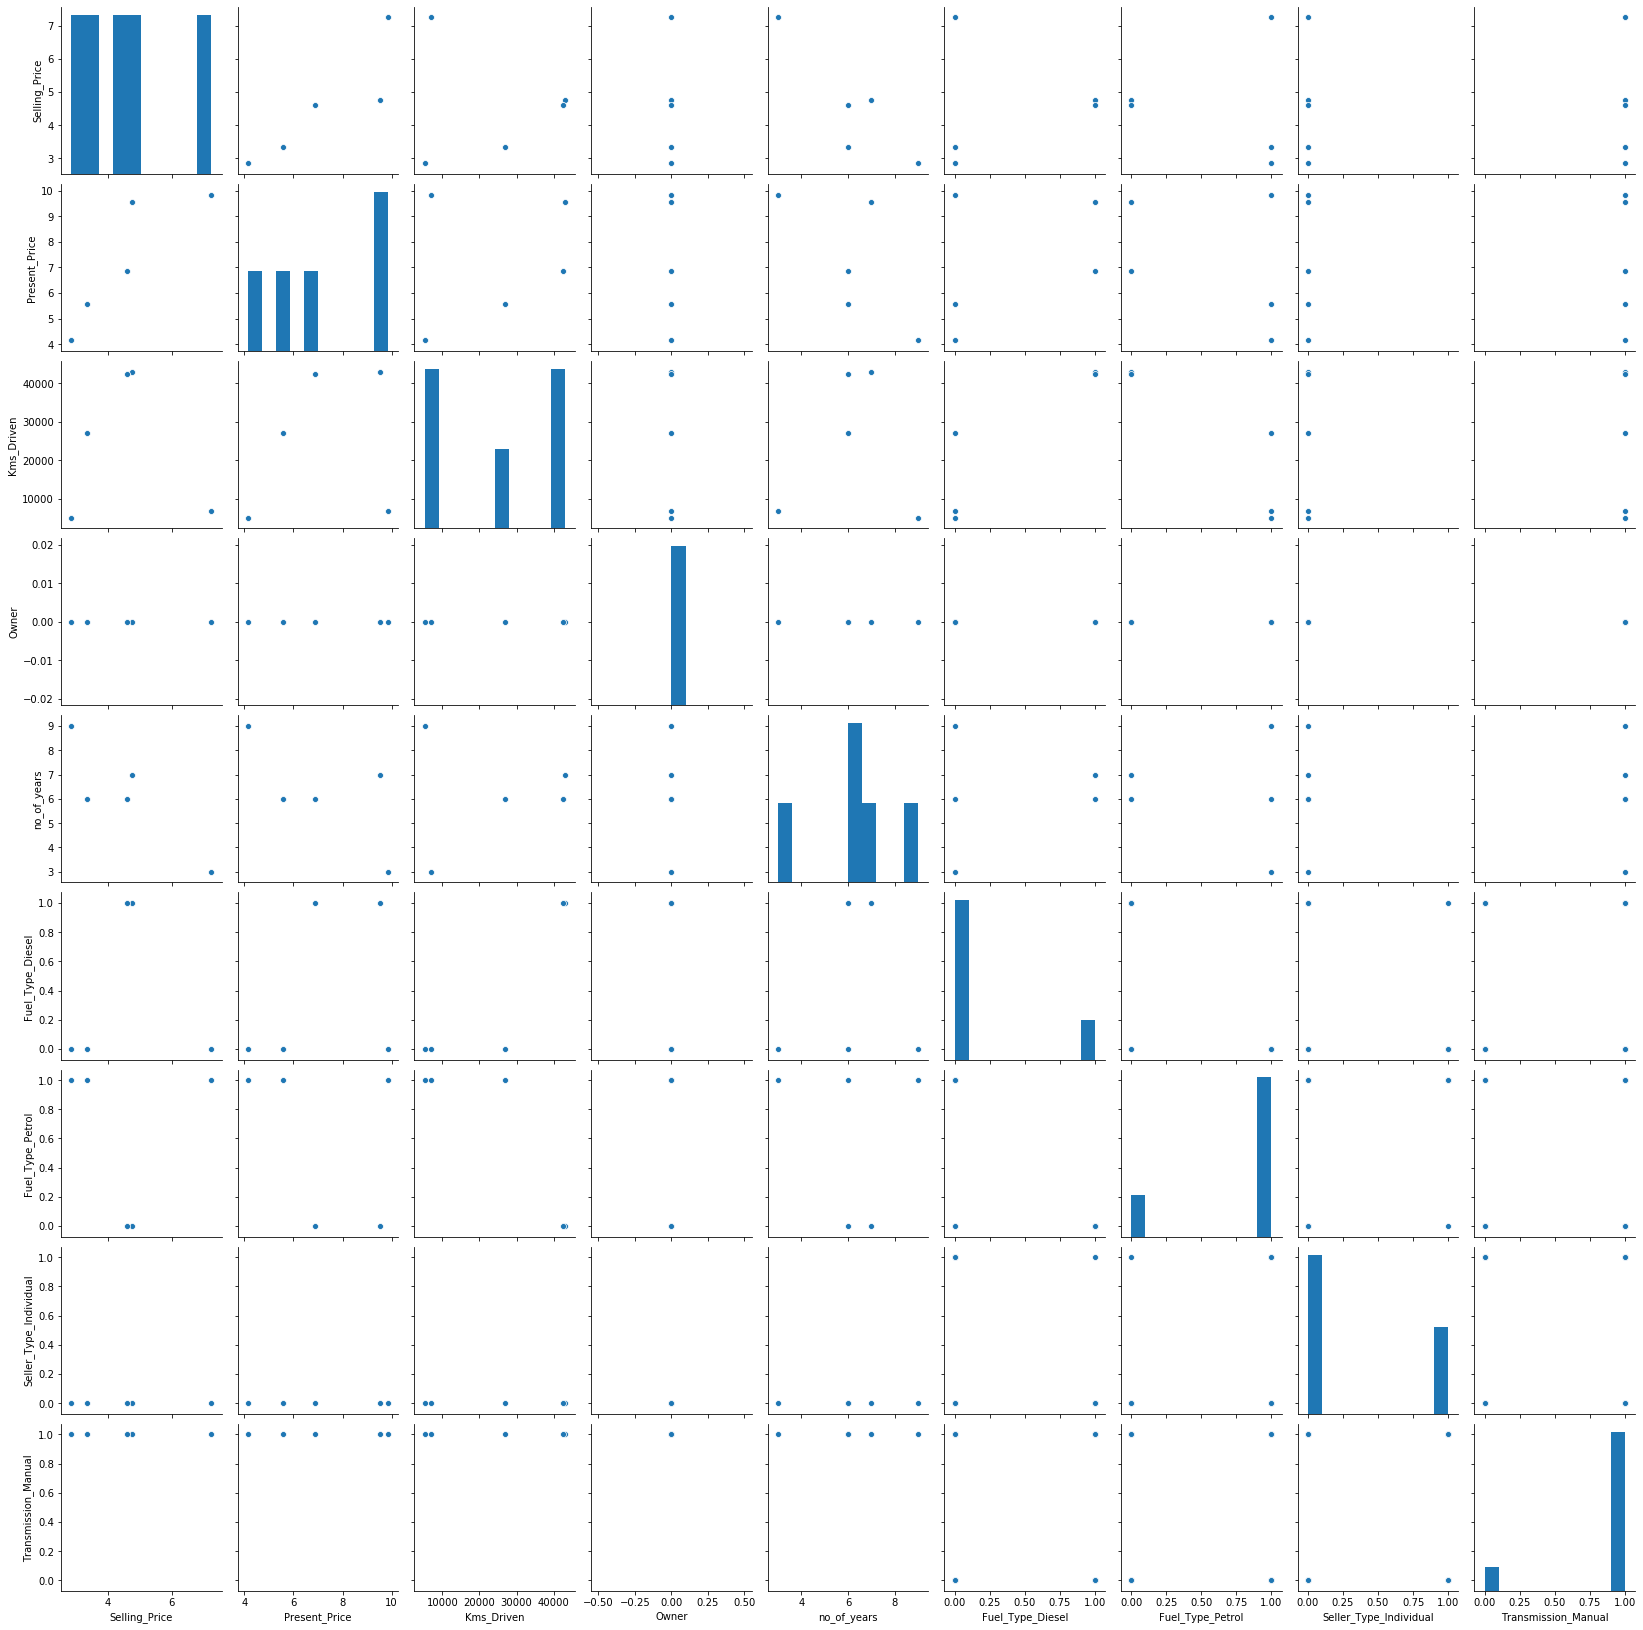

In [54]:
sn.pairplot(ready_df)